# `Análise Exploratória de Dados Provenientes do Covid-19 no Brasil`

#### Este dataset foi obtido a partir da plataforma Kaggle: https://www.kaggle.com/unanimad/corona-virus-brazil. Os dados contidos neste dataset são provenientes dos orgãos de saúde de cada estado.

In [1]:
# Importantando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *
import plotly.express as px
import folium # biblioteca de plots geográficos
import json as js
from folium.plugins import MarkerCluster, TimestampedGeoJson

%matplotlib inline

## `Importantando o Dataframe`:

In [2]:
covid_19 = pd.read_csv("brazil_covid19-V6.csv") # Importando  dataframe

In [3]:
covid_19.info() # Verificando as informações contidas no dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1944 non-null   object
 1   region  1944 non-null   object
 2   state   1944 non-null   object
 3   cases   1944 non-null   int64 
 4   deaths  1944 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 76.1+ KB


* Ao observarmos os dados retornados após inserir o comando `covid_19.info()`. Podemos extrair as seguintes informações:
1. Há três colunas do tipo objeto, a `date` `region` `state`.
2. Há duas colunas com valores inteiros `cases` `deaths`.

In [4]:
covid_19.head(10) # Analisando o cabeçalho dos dados

,date,region,state,cases,deaths
0,2020-01-30,Centro-Oeste,Distrito Federal,0,0
1,2020-01-30,Centro-Oeste,Goiás,0,0
2,2020-01-30,Centro-Oeste,Mato Grosso,0,0
3,2020-01-30,Centro-Oeste,Mato Grosso do Sul,0,0
4,2020-01-30,Nordeste,Alagoas,0,0
5,2020-01-30,Nordeste,Bahia,0,0
6,2020-01-30,Nordeste,Ceará,0,0
7,2020-01-30,Nordeste,Maranhão,0,0
8,2020-01-30,Nordeste,Paraíba,0,0
9,2020-01-30,Nordeste,Pernambuco,0,0


In [5]:
covid_19.columns # Verificando se realmente possui as quatro colunas

Index(['date', 'region', 'state', 'cases', 'deaths'], dtype='object')

* No dataframe `covid_19` podemos observar que temos as colunas `date` `region` `state` `cases` `deaths`.
* Temos também os repectivos dados em relação a data de acontecimento, região do país onde o estado está inserido, a quantidade de casos e mortes por estado.

## `Análise de Dados NaN/Ausentes`:

In [6]:
covid_19.isna().sum() # Verificando a quantidade de valores NaN por coluna

date      0
region    0
state     0
cases     0
deaths    0
dtype: int64

* Podemos verificar que as colunas `date` `region` `state` `cases` `deaths` não possuem dados ausentes.
* Com isso, não precisaremos analisar os dados ausentes ou realizar uma possível substituição dos mesmos.

## `Deletando Colunas Ociosas`:

In [7]:
del covid_19['region'] # Deletei a coluna Region pois não iremos usufruir de seus dados no momento

In [8]:
covid_19.head() # Verificando se realmente foi deletada a coluna no dataframe

,date,state,cases,deaths
0,2020-01-30,Distrito Federal,0,0
1,2020-01-30,Goiás,0,0
2,2020-01-30,Mato Grosso,0,0
3,2020-01-30,Mato Grosso do Sul,0,0
4,2020-01-30,Alagoas,0,0


In [9]:
covid_19.rename(columns={"date":"data","cases":"casos_confirmados","deaths":"mortes_confirmadas","state":"estado"},inplace=True) # Renomeando colunas, lembre-se de colocar o inplace True

In [10]:
covid_19.head()

,data,estado,casos_confirmados,mortes_confirmadas
0,2020-01-30,Distrito Federal,0,0
1,2020-01-30,Goiás,0,0
2,2020-01-30,Mato Grosso,0,0
3,2020-01-30,Mato Grosso do Sul,0,0
4,2020-01-30,Alagoas,0,0


# 1) Gráfico de Barra Horizontal, indicando a quantidade de `casos_confirmados` e `mortes_confirmadas` por Estado:

### 1.1) Criando nosso dataframe agrupado por estado:

In [11]:
df1 = covid_19.groupby('estado').last() # Realiza um groupby em relação aos estados

In [12]:
del df1['data'] # Deletamos a coluna data, pois não iremos utiliza-la nessa análise gráfica

In [13]:
df1.head(27)

,casos_confirmados,mortes_confirmadas
estado,,
Acre,70,2
Alagoas,45,3
Amapá,166,2
Amazonas,981,50
Bahia,604,19
Ceará,1478,58
Distrito Federal,555,14
Espírito Santo,300,7
Goiás,191,8


In [14]:
df1.columns # Verificamos as novas colunas do dataframe

Index(['casos_confirmados', 'mortes_confirmadas'], dtype='object')

### 1.2) Visualizão do Dataframe `df1` por meio do Gradiente de Cores:

In [15]:
df1.style.background_gradient(cmap="Reds")

,casos_confirmados,mortes_confirmadas
estado,,
Acre,70,2
Alagoas,45,3
Amapá,166,2
Amazonas,981,50
Bahia,604,19
Ceará,1478,58
Distrito Federal,555,14
Espírito Santo,300,7
Goiás,191,8


* Observamos que a cor fica mais escura, quando o valor, por exemplo, dos casos confirmados é muito grande, quando comparada com os outros estados.
* Percebemos que o estado de São Paulo e Rio de Janeiro, estão com as cores mais salientes em vermelho, que os demais estados.

## 1.3) `Gráfico por Estado a respeito de casos_confirmados e mortes_confirmadas:`

In [16]:
data = [
    go.Bar(x = df1.index, y=df1.casos_confirmados, name="Casos Confirmados"), # Plot do gráfico na vertical de Suspeitos X Estado
    go.Bar(x = df1.index, y=df1.mortes_confirmadas, name="Mortes Confirmadas"),  # Plot do gráfico na vertical Casos X Estado
]

layout = go.Layout(title="Gráfico do Covid-19 por Estado Brasileiro") # Configuração do Título do Gráfico

In [17]:
fig = go.Figure(data = data, layout = layout)

In [18]:
pyo.plot(fig) # Plota o Gráfico via Plotly

'temp-plot.html'

### `1.4) Gráfico Geográfico dos casos_confirmados e mortes_confirmadas por Estado (segunda opção)`:

In [19]:
brazil_map = folium.Map(location=[-15.776250,-47.796619],tiles = "CartoDB positron", zoom_start=5)

* OBS: Colocar a latitude e Longitude no formato Ex: -70,023434, substituindo ponto por virgula

In [20]:
#Criando a coluna destinada a latitude e longitude de cada estado

N_Longitude  = [
-70.30146,
-36.372506,
-50.79137,
-65.856064,
-38.343577,
-38.647867,
-47.796619,
-40.308865,
-49.836224,
-45.338388,
-56.921101,
-54.545921,
-44.555031,
-52.021542,
-36.781952,
-52.319211,
-36.954105,
-41.736591,
-36.19577,
-51.180061,
-43.40579,
-61.319698,
-61.856049,
-51.092289,
-37.385658,
-46.633308,
-48.33466
]


In [21]:
N_Latitude = [
-9.12893,
-9.672838,
2.05189,
-3.416843,
-12.506686,
-3.931844,
-15.77625,
-19.183422,
-15.827037,
-5.703448,
-12.681871,
-20.61817,
-18.512178,
-25.252089,
-7.239961,
-5.125989,
-8.813717,
-6.40271,
-5.41738,
-29.167391,
-22.939106,
-11.83131,
1.84565,
-27.6534,
-10.574093,
-23.55052,
-10.18451
]

In [22]:
df1.insert(loc=2,column='Latitude',value=N_Latitude) # Inserindo a lista Latitude na coluna do df1

In [23]:
df1.insert(loc=3,column='Longitude',value=N_Longitude) # Inserindo a lista Longitude na coluna do df1

In [24]:
df1.head(27)

,casos_confirmados,mortes_confirmadas,Latitude,Longitude
estado,,,,
Acre,70,2,-9.128930,-70.301460
Alagoas,45,3,-9.672838,-36.372506
Amapá,166,2,2.051890,-50.791370
Amazonas,981,50,-3.416843,-65.856064
Bahia,604,19,-12.506686,-38.343577
Ceará,1478,58,-3.931844,-38.647867
Distrito Federal,555,14,-15.776250,-47.796619
Espírito Santo,300,7,-19.183422,-40.308865
Goiás,191,8,-15.827037,-49.836224


In [25]:
df3 = df1.reset_index(drop=False)

In [26]:
df3.head()

,estado,casos_confirmados,mortes_confirmadas,Latitude,Longitude
0,Acre,70,2,-9.128930,-70.301460
1,Alagoas,45,3,-9.672838,-36.372506
2,Amapá,166,2,2.051890,-50.791370
3,Amazonas,981,50,-3.416843,-65.856064
4,Bahia,604,19,-12.506686,-38.343577


In [27]:
# Criando interação para criar os marcadores de todos os estado baseados na Latitude e Longitude
tooltip= "Covid-19 Information"

for i, row in df3.iterrows():
    html="""
    <h2>Information</h1>
        State: {}<br>
        Cases: {}<br>
        Deaths: {}<br>
    """.format(row['estado'],row['casos_confirmados'],row['mortes_confirmadas'])
    folium.Marker([row["Latitude"],row["Longitude"]],
                  popup = html,
                  tooltip = tooltip,
                  icon = folium.Icon(color='red', icon='info-sign')).add_to(brazil_map)

In [28]:
brazil_map

## 1.5) Heatmap de casos_confirmados e mortes_confirmadas:

In [29]:
from folium.plugins import HeatMap

In [30]:
brazil_heatmap = folium.Map(location=[-15.776250,-47.796619],tiles = "stamentoner", zoom_start=5)

In [31]:
del df3['estado']

In [32]:
df3.head()

,casos_confirmados,mortes_confirmadas,Latitude,Longitude
0,70,2,-9.128930,-70.301460
1,45,3,-9.672838,-36.372506
2,166,2,2.051890,-50.791370
3,981,50,-3.416843,-65.856064
4,604,19,-12.506686,-38.343577


### 

In [33]:
# Criando o Heatmap de casos_confirmados 
locais = df3[["Latitude", "Longitude", "casos_confirmados"]].values.tolist()
HeatMap(locais, radius=20).add_to(brazil_heatmap)

In [34]:
brazil_heatmap

In [35]:
# Criando o Heatmap de mortes_confirmadas
locais = df3[["Latitude", "Longitude", "mortes_confirmadas"]].values.tolist()
HeatMap(locais, radius=20).add_to(brazil_heatmap)

In [36]:
brazil_heatmap

# 2) Gráfico de Barra Vertical, indicando os casos_confirmados e mortes_confirmadas no Brazil:

In [37]:
df1.head()

,casos_confirmados,mortes_confirmadas,Latitude,Longitude
estado,,,,
Acre,70,2,-9.128930,-70.301460
Alagoas,45,3,-9.672838,-36.372506
Amapá,166,2,2.051890,-50.791370
Amazonas,981,50,-3.416843,-65.856064
Bahia,604,19,-12.506686,-38.343577


### 2.3) Excluindo as colunas estado,latitude e longitude:

In [38]:
df4 = df1.reset_index(drop=False)

In [39]:
df4.head()

,estado,casos_confirmados,mortes_confirmadas,Latitude,Longitude
0,Acre,70,2,-9.128930,-70.301460
1,Alagoas,45,3,-9.672838,-36.372506
2,Amapá,166,2,2.051890,-50.791370
3,Amazonas,981,50,-3.416843,-65.856064
4,Bahia,604,19,-12.506686,-38.343577


In [40]:
del df4['estado']

In [41]:
del df4['Latitude']

In [42]:
del df4['Longitude']

In [43]:
df4.sum()

casos_confirmados     19638
mortes_confirmadas     1056
dtype: int64

In [44]:
df4['casos_confirmados']

0       70
1       45
2      166
3      981
4      604
5     1478
6      555
7      300
8      191
9      293
10     112
11      97
12     698
13     643
14      79
15     170
16     684
17      40
18     263
19     636
20    2464
21      32
22      63
23     693
24      42
25    8216
26      23
Name: casos_confirmados, dtype: int64

In [45]:
d = {'casos_confirmados' : df4['casos_confirmados'].sum(), 'mortes_confirmadas': df4['mortes_confirmadas'].sum()}

In [46]:
df5 = pd.DataFrame(d.items(), columns=['Tipo','Valor_Total']).set_index('Tipo')

In [47]:
df5.head()

,Valor_Total
Tipo,
casos_confirmados,19638
mortes_confirmadas,1056


Text(0.5, 1.0, 'Total de Casos Confirmados e Mortes Confirmadas de Covid-19 - Brasil')

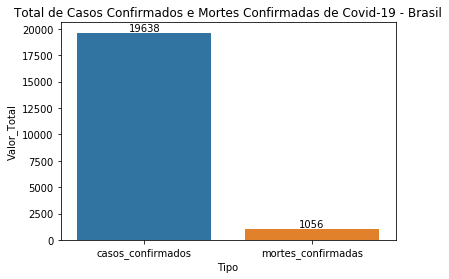

In [48]:
bar = sns.barplot(x=df5.index, y="Valor_Total", data=df5)

for p in bar.patches:
    bar.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),ha='center', va='bottom',color= 'black')
    
bar.set_title('Total de Casos Confirmados e Mortes Confirmadas de Covid-19 - Brasil')

## 2.6) Visualização de Gráficos de Barra Horizontal via Plotly

In [49]:
covid_19.head()

,data,estado,casos_confirmados,mortes_confirmadas
0,2020-01-30,Distrito Federal,0,0
1,2020-01-30,Goiás,0,0
2,2020-01-30,Mato Grosso,0,0
3,2020-01-30,Mato Grosso do Sul,0,0
4,2020-01-30,Alagoas,0,0


In [50]:
df6 = covid_19.drop(columns=['estado'])

In [51]:
df6.head()

,data,casos_confirmados,mortes_confirmadas
0,2020-01-30,0,0
1,2020-01-30,0,0
2,2020-01-30,0,0
3,2020-01-30,0,0
4,2020-01-30,0,0


In [52]:
df7 = df6.groupby(['data'])['casos_confirmados','mortes_confirmadas'].agg('sum')


C:\Users\roque\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [53]:
df7.head()

,casos_confirmados,mortes_confirmadas
data,,
2020-01-30,0,0
2020-01-31,0,0
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,0,0


In [57]:
data = [
    go.Bar(x = df7.index, y=df7.casos_confirmados, name="Casos Confirmados"), # Plot do gráfico na vertical de Suspeitos X Estado
    go.Bar(x =  df7.index, y=df7.mortes_confirmadas, name="Mortes Confirmadas"),  # Plot do gráfico na vertical Casos X Estado
]

layout = go.Layout(title="Gráfico desde O Primeiro Contágio") # Configuração do Título do Gráfico

In [58]:
fig = go.Figure(data = data, layout = layout)

In [59]:
pyo.plot(fig) # Plota o Gráfico via Plotly

'temp-plot.html'